# EDA

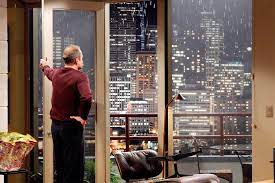

Import the basic libraries and set the pandas format for floats

In [72]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter

plt.rcParams.update(
    {"figure.figsize": (8, 5), "axes.facecolor": "white", "axes.edgecolor": "black"}
)
plt.rcParams["figure.facecolor"] = "w"
pd.plotting.register_matplotlib_converters()
pd.set_option("display.float_format", lambda x: "%.3f" % x)

Import the data from .csv file

In [73]:
df = pd.read_csv("data/eda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

### Clean data

In [74]:
df.drop(columns=["house_id", "id.1"], inplace=True)

rename columns

In [75]:
df.rename(
    columns={
        "yr_built": "year_built",
        "yr_renovated": "year_renovated",
        "long": "lon",
        "date": "sales_date",
    },
    inplace=True,
)
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'lon', 'sqft_living15', 'sqft_lot15', 'sales_date', 'price'],
      dtype='object')

In [76]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


check for duplicated rows

In [77]:
df.duplicated().value_counts()

False    21597
dtype: int64

In [78]:
df.dtypes

id                  int64
bedrooms          float64
bathrooms         float64
sqft_living       float64
sqft_lot          float64
floors            float64
waterfront        float64
view              float64
condition           int64
grade               int64
sqft_above        float64
sqft_basement     float64
year_built          int64
year_renovated    float64
zipcode             int64
lat               float64
lon               float64
sqft_living15     float64
sqft_lot15        float64
sales_date         object
price             float64
dtype: object

bring year_renovated to correct year by dividing by 10

In [79]:
df.year_renovated = df.year_renovated / 10

fill all NAN with -1 in the first place

In [80]:
df.year_renovated.fillna(-1, inplace=True)
df.waterfront.fillna(-1, inplace=True)
df.sqft_basement.fillna(-1, inplace=True)
df.view.fillna(-1, inplace=True)

In [81]:
df = df.astype(
    {
        "bedrooms": np.int16,
        "view": np.int16,
        "condition": np.int16,
        "grade": np.int16,
        "year_built": np.int16,
        "year_renovated": np.int16,
        "zipcode": np.int32,
    },
)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3,1.000,1180.000,5650.000,1.000,-1.000,0,3,7,...,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3,2.250,2570.000,7242.000,2.000,0.000,0,3,7,...,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2,1.000,770.000,10000.000,1.000,0.000,0,3,6,...,0.000,1933,-1,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4,3.000,1960.000,5000.000,1.000,0.000,0,5,7,...,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3,2.000,1680.000,8080.000,1.000,0.000,0,3,8,...,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


add datetime to year_built, year_renovated, sales_date

In [82]:
df.sales_date = pd.to_datetime(df.sales_date, format="%Y-%m-%d")
df["sales_year"] = df.sales_date.dt.year
df["sales_month"] = df.sales_date.dt.month
df["sales_day"] = df.sales_date.dt.day
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price,sales_year,sales_month,sales_day
0,7129300520,3,1.000,1180.000,5650.000,1.000,-1.000,0,3,7,...,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,2014,10,13
1,6414100192,3,2.250,2570.000,7242.000,2.000,0.000,0,3,7,...,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2014,12,9
2,5631500400,2,1.000,770.000,10000.000,1.000,0.000,0,3,6,...,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,2015,2,25
3,2487200875,4,3.000,1960.000,5000.000,1.000,0.000,0,5,7,...,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2014,12,9
4,1954400510,3,2.000,1680.000,8080.000,1.000,0.000,0,3,8,...,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,2015,2,18


insert a few new columns

In [88]:
df["price_per_sqft_living"] = df.price / df.sqft_living
df["price_per_sqft_lot"] = df.price / df.sqft_lot
df["price_per_sqft_living15"] = df.price / df.sqft_living15
df["price_per_sqft_lot15"] = df.price / df.sqft_lot15

Text(0.5, 1.0, 'Distribution of price per lot qsft in neighbourhood count')

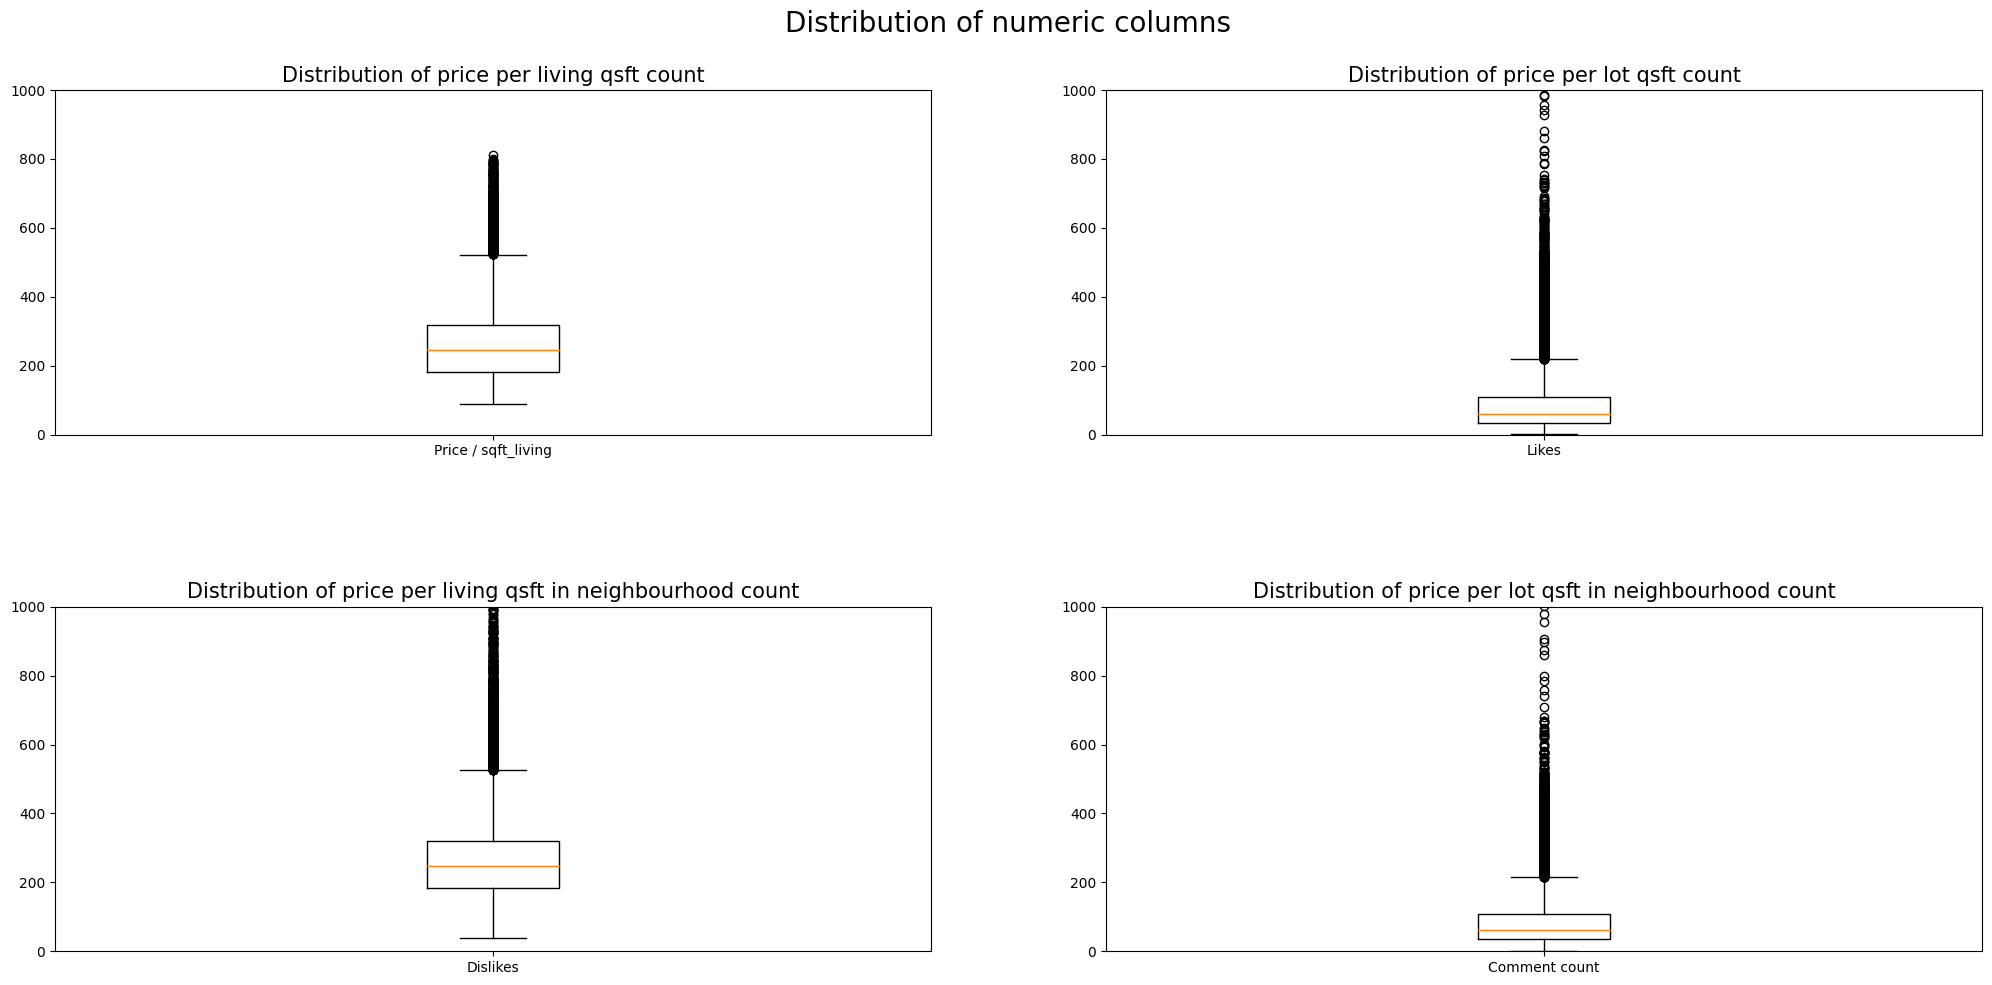

In [94]:
fig, ax = plt.subplots(
    2, 2, figsize=(20, 10)
)  # create subplots on 2 rows and 3 columns
plt.suptitle("Distribution of numeric columns", fontsize=20)
fig.tight_layout()  # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(
    hspace=0.5, wspace=0.2, top=0.9
)  # adjusts the space between the single subplots

ax[0][0].boxplot(x=df["price_per_sqft_living"])  # creates boxplot for number of views
ax[0][0].set_xticklabels(
    labels=["Price / sqft_living"]
)  # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0, 1000)  # limits the y-axis values from 0 to 2000000
ax[0][0].set_title("Distribution of price per living qsft count", fontsize=15)
# sets title for subplot

ax[0][1].boxplot(x=df["price_per_sqft_lot"])
ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_ylim(0, 1000)
ax[0][1].set_title("Distribution of price per lot qsft count", fontsize=15)

ax[1][0].boxplot(x=df["price_per_sqft_living15"])
ax[1][0].set_xticklabels(labels=["Dislikes"])
ax[1][0].set_ylim(0, 1000)
ax[1][0].set_title(
    "Distribution of price per living qsft in neighbourhood count", fontsize=15
)

ax[1][1].boxplot(x=df["price_per_sqft_lot15"])
ax[1][1].set_xticklabels(labels=["Comment count"])
ax[1][1].set_ylim(0, 1000)
ax[1][1].set_title(
    "Distribution of price per lot qsft in neighbourhood count", fontsize=15
)

Text(0.5, 1.0, 'Distribution of price per lot qsft in neighbourhood count')

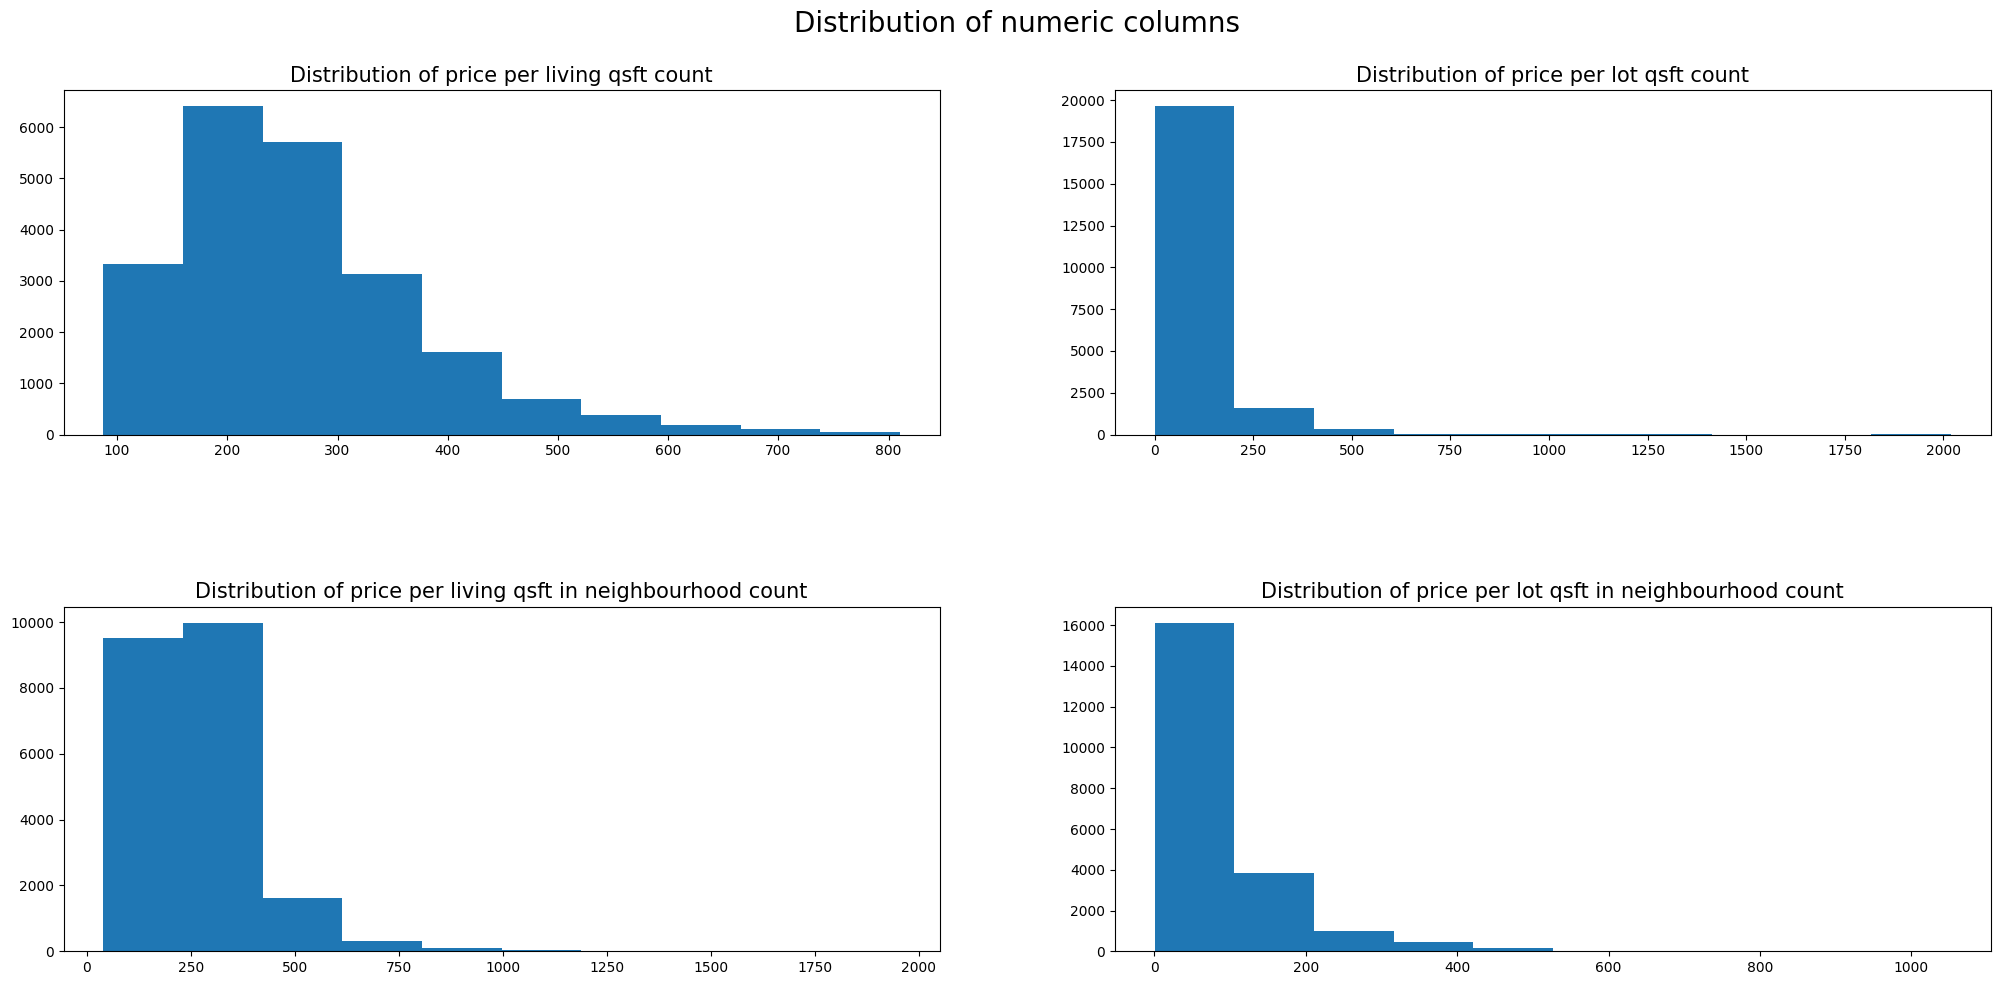

In [98]:
fig, ax = plt.subplots(
    2, 2, figsize=(20, 10)
)  # create subplots on 2 rows and 3 columns
plt.suptitle("Distribution of numeric columns", fontsize=20)
fig.tight_layout()  # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(
    hspace=0.5, wspace=0.2, top=0.9
)  # adjusts the space between the single subplots

ax[0][0].hist(x=df["price_per_sqft_living"])  # creates boxplot for number of views
# ax[0][0].set_xticklabels(labels=["Price / sqft_living"]) # sets the label for the ticks on the x-axis
ax[0][0].set_title("Distribution of price per living qsft count", fontsize=15)
# sets title for subplot

ax[0][1].hist(x=df["price_per_sqft_lot"])
##ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_title("Distribution of price per lot qsft count", fontsize=15)

ax[1][0].hist(x=df["price_per_sqft_living15"])
# ax[1][0].set_xticklabels(labels=["Dislikes"])
ax[1][0].set_title(
    "Distribution of price per living qsft in neighbourhood count", fontsize=15
)

ax[1][1].hist(x=df["price_per_sqft_lot15"])
# ax[1][1].set_xticklabels(labels=["Comment count"])
ax[1][1].set_title(
    "Distribution of price per lot qsft in neighbourhood count", fontsize=15
)